In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer # One hot encoding 
import functions 

import pandas as pd
import seaborn as sns
from matplotlib import cm

sns.set_style("whitegrid")

plt.rcParams.update({'font.size': 14})
cmap = cm.get_cmap('tab20c')
y1_color = cmap(1/20) #bleu 
y2_color = cmap(6/20) #orange
y3_color = cmap(9/20) #vert
y4_color = cmap(14/20) #violet
palette = [y1_color,y2_color,y3_color,y4_color]

/var/folders/wb/j_66l1b92d580qv2dsc3kpmr0000gp/T/ipykernel_65652/2751522629.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20c')


In [2]:

################################################
############ Marginal
################################################

def plot_resultats_(resultats,alpha,dataset):
    sns.set_style("whitegrid") 
    ############ Coverage:
    plt.figure(figsize=(4,6))
    g =sns.catplot( 
        data=resultats,  kind="bar",
        x="Method", y="Coverage", hue="Method", palette=[y1_color,y2_color,y3_color,y4_color],height=5,width=0.8,capsize=0.3,aspect=1,order=["IP","MS","APS","OTCP"]
    )   
    g.refline(y=alpha, color='black',linestyle="dashed",linewidth=2)
    plt.ylim(0,1)
    sns.despine(trim=True, left=True)
    plt.savefig("Figures/Classif_coverage_{}.pdf".format(dataset), format="pdf",bbox_inches="tight")
    plt.show()
    ############ Efficiency:
    plt.figure(figsize=(4,6))
    g =sns.catplot( 
        data=resultats,  kind="bar",
        x="Method", y="Efficiency", hue="Method", palette=[y1_color,y2_color,y3_color,y4_color],height=5,width=0.8,capsize=0.3,aspect=1,order=["IP","MS","APS","OTCP"]
    )   
    plt.ylabel("Size") 
    sns.despine(trim=True, left=True)
    plt.savefig("Figures/Classif_efficiency_{}.pdf".format(dataset), format="pdf",bbox_inches="tight") 
    ############ Informativeness:
    plt.figure(figsize=(4,6))
    g =sns.catplot( 
        data=resultats,  kind="bar",
        x="Method", y="Informativeness", hue="Method", palette=[y1_color,y2_color,y3_color,y4_color],height=5,width=0.8,capsize=0.3,aspect=1,order=["IP","MS","APS","OTCP"]
    )   
    plt.ylabel("Informativeness") 
    sns.despine(trim=True, left=True)
    plt.savefig("Figures/Classif_informativeness_{}.pdf".format(dataset), format="pdf",bbox_inches="tight")


################################################
############ Conditional (wrt label)
################################################

def plot_resultats_condit_to_y_(resultats_condit_to_y,alpha,dataset):
    sns.set(font_scale=1.5, style="whitegrid" )
    ############ Coverage:
    nb_ = len(np.unique(resultats_condit_to_y["Label"]))
    plt.figure()
    g =sns.catplot( 
        data=resultats_condit_to_y,  kind="bar",
        x="Label", y="Coverage", hue="Method", palette=[y2_color,y3_color,y4_color,y1_color],height=5,width=0.8,capsize=0.3,aspect=1.5,hue_order=["IP","MS","APS","OTCP"]
    )   
    g.refline(y=alpha, color='black',linestyle="dashed",linewidth=2)
    sns.move_legend(g,ncol=4, loc= "upper center",bbox_to_anchor=(0.5,1.15))
    plt.ylabel("Coverage") 
    plt.ylim(0.5,1)
    plt.savefig("Figures/Classif_cond_to_y_Coverage_{}K5.pdf".format(dataset), format="pdf",bbox_inches="tight")
    plt.show()
    ############ Efficiency:
    plt.figure()
    g = sns.catplot( 
        data=resultats_condit_to_y,  kind="bar",
        x="Label", y="Efficiency", hue="Method", palette=[y2_color,y3_color,y4_color,y1_color],height=5,width=0.8,capsize=0.3,aspect=1.5,hue_order=["IP","MS","APS","OTCP"]
    )   
    sns.move_legend(g,ncol=4, loc= "upper center",bbox_to_anchor=(0.5,1.15))
    plt.ylabel("Size") 
    plt.savefig("Figures/Classif_cond_to_y_Efficiency_{}K5.pdf".format(dataset), format="pdf",bbox_inches="tight")
    plt.show()
    ############ Informativeness:
    plt.figure()
    g = sns.catplot( 
        data=resultats_condit_to_y,  kind="bar",
        x="Label", y="Informativeness", hue="Method", palette=[y2_color,y3_color,y4_color,y1_color],height=5,width=0.8,capsize=0.3,aspect=1.5,hue_order=["IP","MS","APS","OTCP"]
    )   
    sns.move_legend(g,ncol=4, loc= "upper center",bbox_to_anchor=(0.5,1.15))
    plt.ylabel("Informativeness") 
    plt.savefig("Figures/Classif_cond_to_y_Informativeness_{}K5.pdf".format(dataset), format="pdf",bbox_inches="tight")
    plt.show()
    



# K=5 classes

(30000, 28, 28)


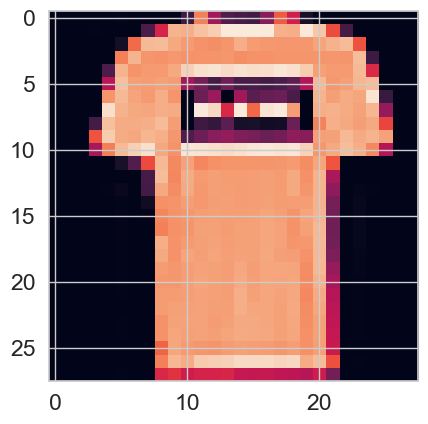

In [9]:
# Dataset des chiffres du MNIST
from keras.datasets import mnist,fashion_mnist

from sklearn.ensemble import RandomForestClassifier

dataset = "fashion" # "fashion" or "mnist"

if dataset == "mnist":
    (images, labels), (test_X, test_y) = mnist.load_data()
if dataset == "fashion":
    (images, labels), (test_X, test_y) = fashion_mnist.load_data()

K = 5 
to_keep = [0,2,4,6,9]  
images = np.concatenate([images[labels==i] for i in to_keep])
labels = np.concatenate([np.repeat(j,len(labels[labels==i])) for j,i in enumerate(to_keep)]) # keep labels and rename them between 0 and K 

print(images.shape) 
plt.imshow(images[labels==0][0]) 

In [10]:
#### REPEAT EXPERIMENTS 
alpha = 0.9 
clf = RandomForestClassifier(n_estimators=50)

N = 10
resultats = []
resultats_condit_to_y = []
for rep in range(N):
    print(rep)
    n = 10000  # Number of data samples   # Number of data samples 
    indices = np.random.choice(len(images),n)
    X, Y = images[indices].reshape(n,images.shape[1]*images.shape[2]), labels[indices]
    K = len(np.unique(Y))
    # SPLIT TRAIN / CALIB / TEST 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
    X_test, X_cal, y_test, y_cal = train_test_split(X_test, y_test, test_size=0.8)
    y_test, y_cal = y_test.flatten(), y_cal.flatten()

    # LEARN CLASSIFIER AND GET SCORES FOR CALIBRATION DATA 
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

    # APPLY ALL METHODS 
    calib_parameters = functions.CalibAllMetrics(X_cal,y_cal,clf, alpha,K)
    res_OTCP,res_IP,res_MS, res_APS = functions.TestAllMetrics(X_test,y_test,clf,calib_parameters,K)
    
    resultats.append( np.array(res_OTCP).tolist()+["OTCP"] )
    resultats.append( np.array(res_IP).tolist()+["IP"] )
    resultats.append( np.array(res_MS).tolist()+["MS"] )
    resultats.append( np.array(res_APS).tolist()+["APS"] )
    K = len(np.unique(y_test))
    for y in range(K):
        X_test_y = X_test[y_test==y]
        y_test_y = y_test[y_test==y]
        res_OTCP,res_IP,res_MS, res_APS = functions.TestAllMetrics(X_test_y,y_test_y,clf,calib_parameters,K)
        resultats_condit_to_y.append( np.array(res_OTCP).tolist()+["OTCP"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_IP).tolist()+["IP"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_MS).tolist()+["MS"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_APS).tolist()+["APS"]+["{}".format(y)] )

resultats = pd.DataFrame(resultats,columns=["Coverage","Efficiency","Informativeness","WSC-Coverage","Method"]) 
resultats_condit_to_y = pd.DataFrame(resultats_condit_to_y,columns=["Coverage","Efficiency","Informativeness","WSC-Coverage","Method","Label"])

# We save the results 
resultats.to_csv('csv/classif_{}_resultatsK5.csv'.format(dataset), index=False)
resultats_condit_to_y.to_csv('csv/classif_{}_condit_y_resultatsK5.csv'.format(dataset), index=False)


0
0.838
1
0.848
2
0.845
3
0.833
4
0.846
5
0.824
6
0.842
7
0.863
8
0.854
9
0.828


fashion


<Figure size 640x480 with 0 Axes>

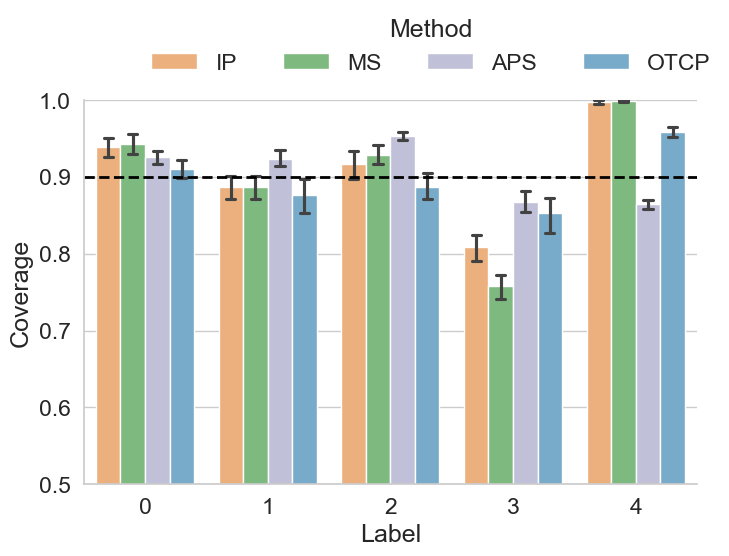

<Figure size 640x480 with 0 Axes>

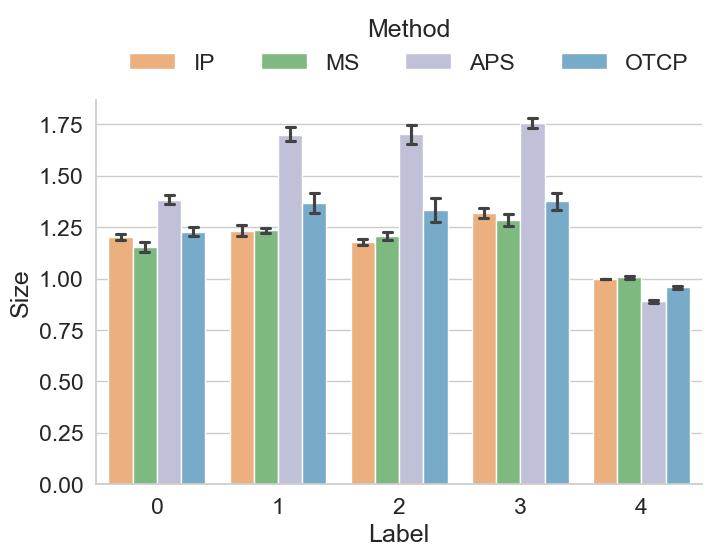

<Figure size 640x480 with 0 Axes>

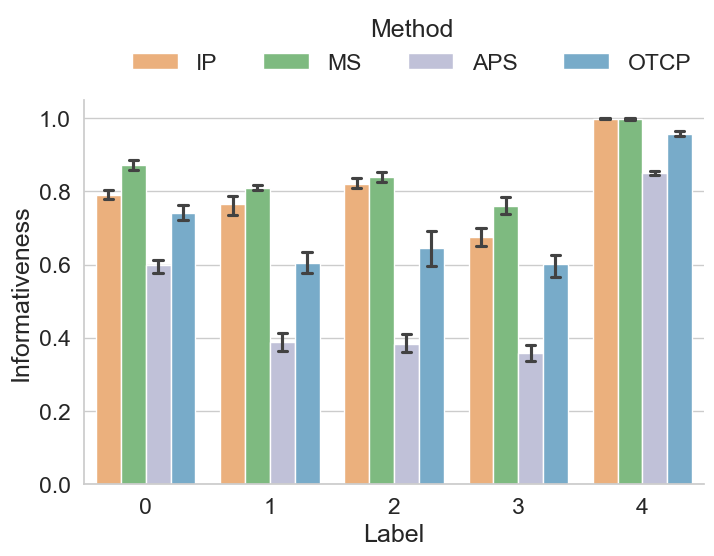

In [11]:
print(dataset)

plot_resultats_condit_to_y_(resultats_condit_to_y,alpha,dataset)  